### Imports

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# CPU hours investigation

## Load and prepare your data

### Your time data

In [16]:
# Load your file that timed the execution time of a RTModel for each event
file_path = '/Users/stela/Documents/Scripts/orbital_task/RTModel_runs/sample_rtmodel_v2.4/time_to_run_sample.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()
    times_array__seconds = []
    event_names = []
    for line in lines:
        time = line.split('took ')[1].split(' seconds')[0]
        event_name = line.split(' took ')[0].replace('E', 'e').replace(' ', '_')
        float_time = float(time)
        times_array__seconds.append(float_time)
        event_names.append(event_name)

times_array__minutes = np.array(times_array__seconds) / 60
times_array__hours = np.array(times_array__seconds) / 3600
CPU_hours = 40 * times_array__hours
dict = {'event_name': event_names,
        'time__seconds': times_array__seconds,
        'time__minutes': times_array__minutes,
        'time__hours': times_array__hours,
        'CPU_hours': CPU_hours}
time_df = pd.DataFrame(dict)
time_df.set_index('event_name', inplace=True)

### Your model data

In [17]:
working_data = pd.read_csv(
    '/Users/stela/Documents/Scripts/orbital_task/jasmine/analysis/rtmodelv2.4_statistics.csv',
    index_col=['event_name'])

## Data exploration

In [18]:
print(f'Mean time: {np.mean(times_array__minutes)} minutes in 40 processors')
print(f'Min time: {np.min(times_array__minutes)} minutes in 40 processors')
print(f'Max time: {np.max(times_array__minutes)} minutes in 40 processors')
print(f'Median time: {np.median(times_array__minutes)} minutes in 40 processors')

print(f'Mean CPU hours: {40 * (np.mean(times_array__hours))} hours')
print(f'Min CPU hours: {40 * (np.min(times_array__hours))} hours')
print(f'Max CPU hours: {40 * (np.max(times_array__hours))} hours')
print(f'Median CPU hours: {40 * np.median(times_array__hours)} hours')

Mean time: 51.17554026383917 minutes in 40 processors
Min time: 6.950627191861471 minutes in 40 processors
Max time: 140.6118309458097 minutes in 40 processors
Median time: 61.29891043106715 minutes in 40 processors
Mean CPU hours: 34.11702684255944 hours
Min CPU hours: 4.63375146124098 hours
Max CPU hours: 93.7412206305398 hours
Median CPU hours: 40.8659402873781 hours


Text(0.5, 0, 'CPU hours')

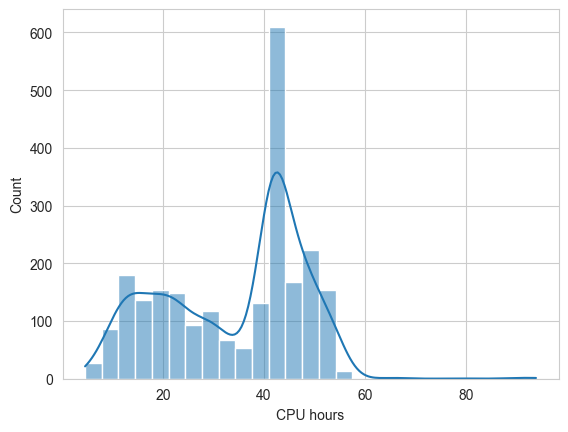

In [19]:
sns.histplot(CPU_hours, kde=True)
plt.xlabel('CPU hours')

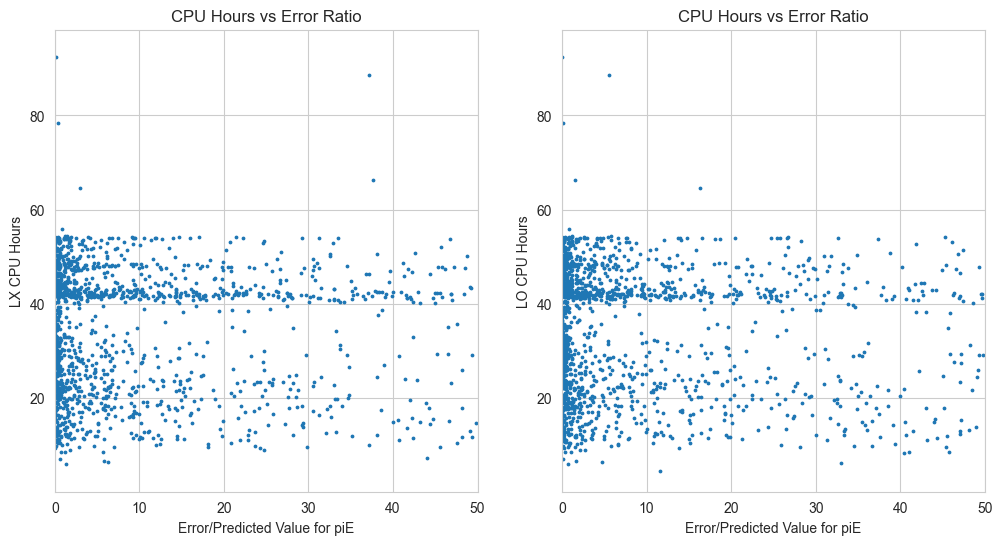

In [20]:
# Align the DataFrames by their index (event_name)
time_df_aligned = time_df.loc[working_data.index]
# Now plot CPU_hours vs error_ratio
piE_type = 'piE'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(working_data[f'LX_{piE_type}_absolute_predicted_error_predicted_value_ratio'], time_df_aligned['CPU_hours'], s=3)
plt.xlabel(f'Error/Predicted Value for {piE_type}')
plt.ylabel('LX CPU Hours')
plt.title('CPU Hours vs Error Ratio')
plt.xlim(0, 50)
plt.subplot(1, 2, 2)
plt.scatter(working_data[f'LO_{piE_type}_absolute_predicted_error_predicted_value_ratio'], time_df_aligned['CPU_hours'], s=3)
plt.xlabel(f'Error/Predicted Value for {piE_type}')
plt.ylabel('LO CPU Hours')
plt.title('CPU Hours vs Error Ratio')

plt.xlim(0, 50)
plt.grid(True)
plt.show()

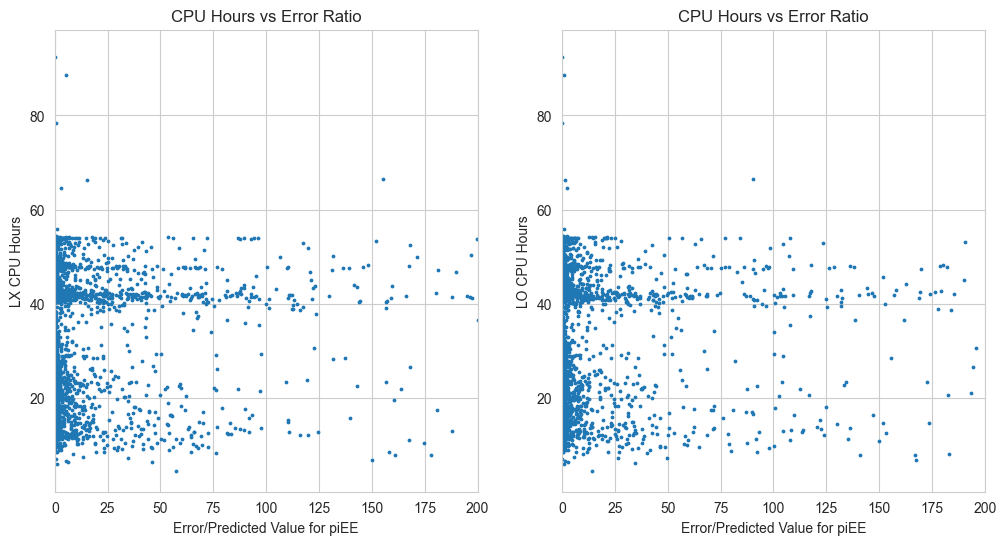

In [21]:
piE_type = 'piEE'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(working_data[f'LX_{piE_type}_absolute_predicted_error_predicted_value_ratio'], time_df_aligned['CPU_hours'], s=3)
plt.xlabel(f'Error/Predicted Value for {piE_type}')
plt.ylabel('LX CPU Hours')
plt.title('CPU Hours vs Error Ratio')
plt.xlim(0, 200)
plt.subplot(1, 2, 2)
plt.scatter(working_data[f'LO_{piE_type}_absolute_predicted_error_predicted_value_ratio'], time_df_aligned['CPU_hours'], s=3)
plt.xlabel(f'Error/Predicted Value for {piE_type}')
plt.ylabel('LO CPU Hours')
plt.title('CPU Hours vs Error Ratio')

plt.xlim(0, 200)
plt.grid(True)
plt.show()

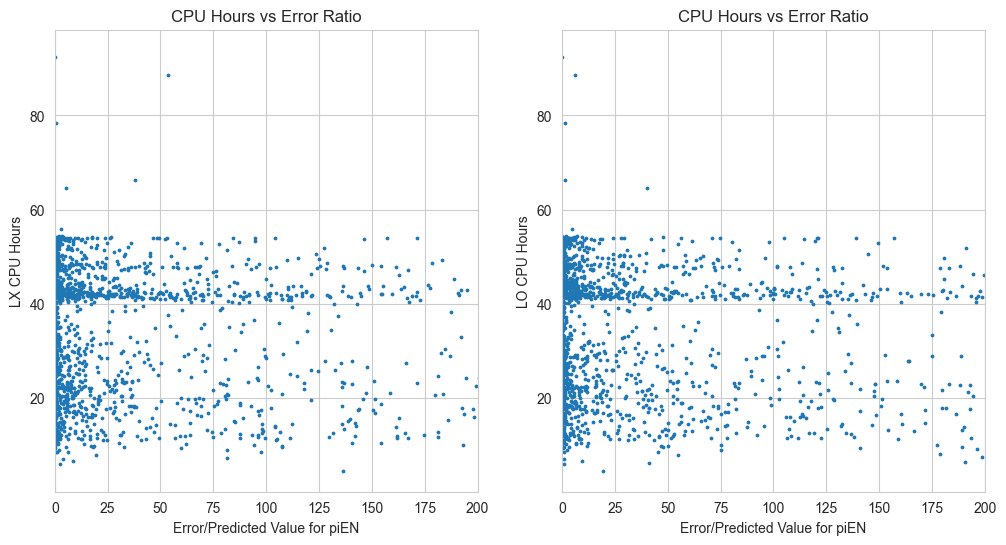

In [22]:
piE_type = 'piEN'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(working_data[f'LX_{piE_type}_absolute_predicted_error_predicted_value_ratio'], time_df_aligned['CPU_hours'], s=3)
plt.xlabel(f'Error/Predicted Value for {piE_type}')
plt.ylabel('LX CPU Hours')
plt.title('CPU Hours vs Error Ratio')
plt.xlim(0, 200)
plt.subplot(1, 2, 2)
plt.scatter(working_data[f'LO_{piE_type}_absolute_predicted_error_predicted_value_ratio'], time_df_aligned['CPU_hours'], s=3)
plt.xlabel(f'Error/Predicted Value for {piE_type}')
plt.ylabel('LO CPU Hours')
plt.title('CPU Hours vs Error Ratio')

plt.xlim(0, 200)
plt.grid(True)
plt.show()